In [1]:
import requests
import pandas as pd
import numpy as np

response = requests.get('https://web.byui.edu/studentemployment/api/jobs')

data_json = response.json()

data = pd.DataFrame(data_json)

In [6]:
from datetime import datetime, timedelta
import pytz

newYorkTz = pytz.timezone('US/Mountain') 
timeZoneMountain = datetime.now(newYorkTz)
currentTimeInRexburg = timeZoneMountain.strftime("%Y-%m-%d")

currentTimeInRexburg

'2022-10-22'

In [4]:
today_data = data[data.dateUpdated >= currentTimeInRexburg]

today = today_data.shape[0]

today

0

In [7]:
data[data.dateUpdated == (datetime.today() - timedelta(1)).strftime("%Y-%m-%d")]

,jobID,title,departmentName,description,summary,displayJob,dateUpdated,startDate,endDate,managerName,...,beginningDate,recruitingStartDate,requireResume,limitApplicants,limitNumber,applicants,jobQuestions,isOnline,allowOnline,jobMajors


In [8]:
data.columns

Index(['jobID', 'title', 'departmentName', 'description', 'summary',
       'displayJob', 'dateUpdated', 'startDate', 'endDate', 'managerName',
       'approximateHoursPerWeek', 'payRate', 'positionsAllocated',
       'positionsAvailble', 'workSchedule', 'beginningDate',
       'recruitingStartDate', 'requireResume', 'limitApplicants',
       'limitNumber', 'applicants', 'jobQuestions', 'isOnline', 'allowOnline',
       'jobMajors'],
      dtype='object')

In [7]:
data[data.title == 'Reports and Systems Analyst'].iloc[0]

jobID                                                                1187288
title                                            Reports and Systems Analyst
departmentName                                      BYU Idaho Support Center
description                <p><span>The Reports and Systems Analyst is re...
summary                    The Reports and Systems Analyst is responsible...
displayJob                                                              True
dateUpdated                                       2022-10-18T20:44:23.300014
startDate                                                                NaN
endDate                                                                  NaN
managerName                                                      Luisa Silva
approximateHoursPerWeek                                                15-40
payRate                                                                 12.0
positionsAllocated                                                     100.0

In [9]:
import time

In [19]:
today_data = data[data.dateUpdated >= time.strftime("%Y-%m-%d")]

today = today_data.shape[0]

In [1]:
import requests # to get the html markdown from the url
from bs4 import BeautifulSoup # to make the html readable
import pandas as pd # to save table in a csv

In [2]:
url_surplus = 'https://web.byui.edu/SurplusList/'
html_data = requests.get(url_surplus)
soup = BeautifulSoup(html_data.text, 'html.parser')


In [3]:

# Build Table
rows=[]
for item in soup.find_all('tr')[13:]:
    row={}
    row['Item Number'] = item.select('td')[0].text
    row['Qty'] = item.select('td')[1].text
    row['Description'] = item.select('td')[2].text
    row['Condition'] = item.select('td')[3].text
    row['Price'] = item.select('td')[4].text
    row['Location'] = item.select('td')[5].text
    row['Quick/Bid'] = item.select('td')[6].text
    # row['Image'] = item.select('td')[7].text
    rows.append(row)


In [6]:
soup.find_all('tr')[13]

<tr bgcolor="#EEEEEE">
<td align="center"><font color="Black">77122</font></td><td><font color="Black">1</font></td><td class="GridDisplayDescription" width="50%"><font color="Black">BKI Free  Standing Fry Dump Station or Food Warmer</font></td><td><font color="Black">GOOD</font></td><td align="right"><font color="Black">$175.00</font></td><td><font color="Black">EA</font></td><td><font color="Black">Quick</font></td><td><font color="Black"><a href="" onclick="javascript:window.open('DisplayImages.aspx?ItemId=39460'); return false;">Image</a></font></td>
</tr>

In [11]:
data = pd.DataFrame(rows)
data.drop(data.tail(1).index,inplace=True) # Drop last row (is empty)
data.Price = pd.to_numeric(data.Price.str.replace("$","",regex=True).replace(",","",regex=True))

In [12]:
data.Price.max()

6300.0

In [15]:
data[data.Condition == 'EXCELLENT'].shape[0]

4

In [16]:
names = data['Condition'].value_counts().reset_index()['index']
values = data['Condition'].value_counts().reset_index()['Condition']

In [2]:
import pytz
from datetime import datetime, timedelta

In [6]:
IdahoTz = pytz.timezone('US/Mountain')
IdahoTz

<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>

In [7]:
timeZoneMountain = datetime.now(IdahoTz)
timeZoneMountain

datetime.datetime(2022, 10, 19, 9, 41, 35, 224596, tzinfo=<DstTzInfo 'US/Mountain' MDT-1 day, 18:00:00 DST>)

In [8]:
currentTimeInRexburg = timeZoneMountain.strftime("%Y-%m-%d")
currentTimeInRexburg

'2022-10-19'

In [10]:
( timeZoneMountain - timedelta(1) ).strftime("%Y-%m-%d")

'2022-10-18'

# TIME LINE 🐍

In [169]:
import requests
import pandas as pd

response = requests.get('https://web.byui.edu/studentemployment/api/jobs')

data_json = response.json()

data = pd.DataFrame(data_json)

In [170]:
start_dates = data.startDate.dropna().replace('T',' ',regex=True)

In [195]:
start_dates_formatted = [datetime.strptime(str(d), "%Y-%m-%d %H:%M:%S") for d in start_dates] 

In [180]:
start_dates_formatted

[datetime.datetime(2022, 10, 20, 13, 0),
 datetime.datetime(2022, 10, 20, 7, 0),
 datetime.datetime(2022, 10, 20, 6, 0),
 datetime.datetime(2022, 10, 20, 6, 0),
 datetime.datetime(2022, 10, 20, 12, 0),
 datetime.datetime(2022, 10, 13, 11, 0),
 datetime.datetime(2022, 10, 20, 18, 0),
 datetime.datetime(2022, 10, 12, 0, 0),
 datetime.datetime(2022, 10, 18, 5, 0),
 datetime.datetime(2022, 10, 3, 21, 0),
 datetime.datetime(2022, 10, 18, 13, 0),
 datetime.datetime(2022, 10, 18, 6, 0),
 datetime.datetime(2022, 9, 29, 6, 0),
 datetime.datetime(2022, 7, 2, 12, 0),
 datetime.datetime(2022, 6, 7, 12, 0),
 datetime.datetime(2022, 9, 20, 18, 0),
 datetime.datetime(2022, 10, 17, 12, 0),
 datetime.datetime(2022, 10, 18, 0, 0),
 datetime.datetime(2022, 10, 17, 12, 0),
 datetime.datetime(2022, 10, 17, 6, 0),
 datetime.datetime(2022, 7, 2, 1, 0),
 datetime.datetime(2022, 10, 12, 19, 0),
 datetime.datetime(2022, 6, 8, 4, 0),
 datetime.datetime(2022, 6, 8, 1, 0),
 datetime.datetime(2022, 10, 13, 6, 0),
 

In [96]:
import pytz

In [194]:
IdahoTz = pytz.timezone('US/Mountain') 
timeZoneMountain = datetime.now(IdahoTz)
currentTimeInRexburg = timeZoneMountain.strptime('2022-09-01',"%Y-%m-%d")

currentTimeInRexburg

datetime.datetime(2022, 9, 1, 0, 0)

In [103]:
datetime.strptime

datetime.datetime(2022, 10, 21, 13, 3, 14, 710758)

In [183]:
start_dates_formatted = [
    d
    for d in start_dates_formatted
    if d > currentTimeInRexburg
]

In [184]:
len(start_dates_formatted)

32

In [185]:
rand_names = range(32)

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [187]:
names = rand_names
dates = start_dates_formatted

In [188]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

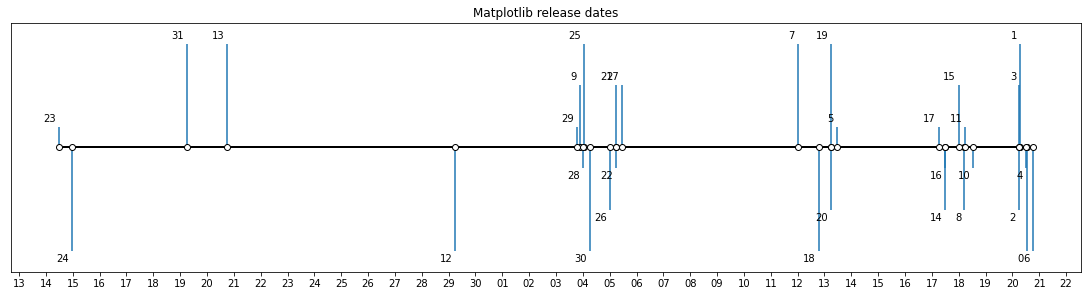

In [189]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="white")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))
# plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

In [192]:
def convert_date(x,y,z):
    orig_date = datetime(x,y,z)
    orig_date = str(orig_date)
    d = datetime.strptime(orig_date, '%Y-%m-%d %H:%M:%S')
    d = d.strftime('%m-%d-%y')
    return d

In [193]:
convert_date(2020,12,18)

'12-18-20'

In [214]:
datax = data.startDate.dropna().replace('T','-',regex=True)

In [216]:
datax[0].split('-')[:3]

['2022', '10', '20']

In [10]:
from bs4 import BeautifulSoup

In [11]:
response = requests.get("https://www.house.gov/representatives")
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.select('table')
rows = []
for table in tables[:56]:
    row = {}
    row['District']             = [x.text.strip() for x in table.select('td')][0::6]
    row['Name']                 = [x.text.strip() for x in table.select('td')][1::6]
    row['Party']                = [x.text.strip() for x in table.select('td')][2::6]
    row['Office Room']          = [x.text.strip() for x in table.select('td')][3::6]
    row['Phone']                = [x.text.strip() for x in table.select('td')][4::6]
    row['Committee Assignment'] = [x.text.strip() for x in table.select('td')][5::6]
    row['State']                = table.select_one('caption').text.strip()
    rows.append(pd.DataFrame(row))
data = pd.concat(rows)

In [13]:
data[data.Party=='D'].shape[0]

226

In [17]:
data.State.value_counts().reset_index()

,index,State
0,California,53
1,Texas,36
2,Florida,27
3,New York,27
4,Pennsylvania,18
5,Illinois,18
6,Ohio,16
7,Michigan,14
8,Georgia,14
9,North Carolina,13


In [20]:
x = [1,2,3,4,5,6,7,8,9,10]
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
type(x)

list

In [ ]:
# list comprehension

[
    
]

In [2]:
projectOption = {
   'Billionaires':1,
   'Class Catalog - BYUI':2,
   'Country Code':3,
   'FIFA World Cup':4,
   'Financial Data':5,
   'Forbes - Billionaries':6,
   'Forbes - Universities':7,
   'Irvine Spectrum Center':8,
   'Job Board - BYUI':9,
   'Mutual App Feedback':10,
   'News - CBS':11,
   'Politicos Chilenos':12,
   'Políticos Españoles':13,
   'SINCA MMA Gob':14,
   'Surplus Store - BYUI':15,
   'house.gov/representatives':16,
   'test':17
}

In [23]:
tuple(projectOption.keys())

('Billionaires',
 'Class Catalog - BYUI',
 'Country Code',
 'FIFA World Cup',
 'Financial Data',
 'Forbes - Billionaries',
 'Forbes - Universities',
 'Irvine Spectrum Center',
 'Job Board - BYUI',
 'Mutual App Feedback',
 'News - CBS',
 'Politicos Chilenos',
 'Políticos Españoles',
 'SINCA MMA Gob',
 'Surplus Store - BYUI',
 'house.gov/representatives',
 'test')

In [41]:
projectOption['Billionaires']

1

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
url = 'https://www.fifplay.com/fifa-23-player-ratings/'

response = requests.get(url)

soup = BeautifulSoup(response.text)

In [72]:
soup.find_all('li')[-85]

<li>RB: <strong><a href="https://www.fifplay.com/fifa-23/players/188377/kyle-walker/" target="_blank">Kyle Walker</a></strong> (85) - Manchester City</li>